In [1]:
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json
from sklearn.cluster import DBSCAN, AgglomerativeClustering, KMeans
from sklearn.metrics import pairwise_distances
sns.set(style="whitegrid")

In [11]:
%load_ext autoreload
%autoreload 2

In [16]:
from DataProvider import DataProvider
from Visualizer import Visualizer
from Clusterer import Clusterer

In [24]:
hamburg="test-data/27_teams_3ce786ba.json"
mainz_alt="test-data/36_teams_5a005256.json"
mainz_complete="test-data/45_teams_b17d628f.json"

data = DataProvider(mainz_alt)
routes = data.get_routes()
dist_matrix = data.get_distance_matrix()

In [25]:
clusterer_balanced = Clusterer(routes, dist_matrix, algorithm="balanced", cluster_sizes=data.get_cluster_sizes())
balanced_routes, balanced_labels = clusterer_balanced.cluster()
print(balanced_labels)

[1 3 2 2 1 0 2 1 1 2 0 2 3 0 2 1 0 1 0 3 0 0 3 2 2 0 1 1 3 3 3 0 3 3 2 1]


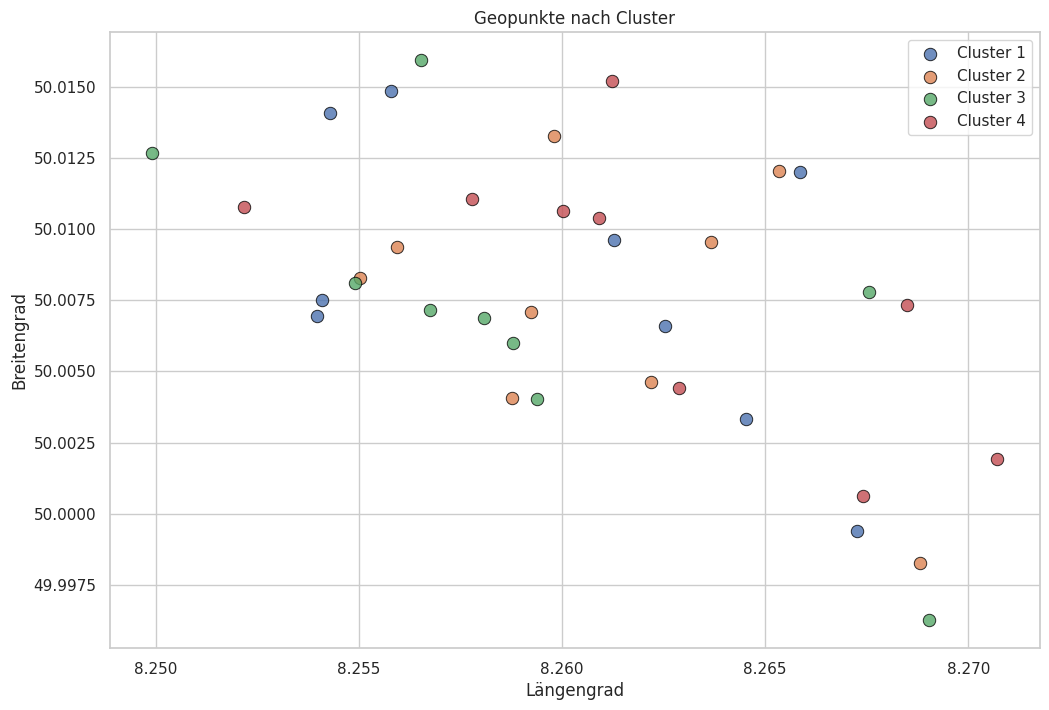

In [26]:
vis = Visualizer(routes, dist_matrix)
vis.plot_geocodes()

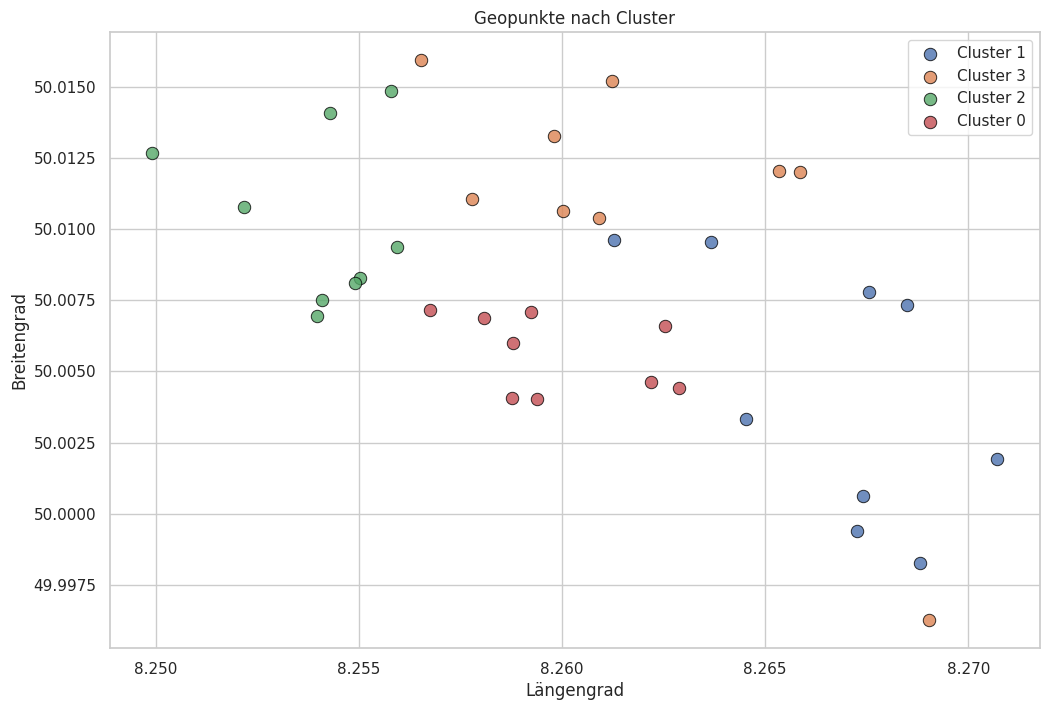

In [27]:
vis_optimized = Visualizer(balanced_routes, dist_matrix)
vis_optimized.plot_geocodes()

In [31]:
#n_clusters=3
#distance_threshold=7500
distance_threshold=1000

agg_cluster = Clusterer(routes, dist_matrix, n_clusters=4)
agg_routes, agg_labels = agg_cluster.cluster()
print(agg_labels)
agg_cluster.print_max_distances_per_cluster(agg_routes, dist_matrix)

[1 2 0 1 2 1 1 3 2 1 1 0 0 1 1 3 1 2 1 2 1 1 3 1 0 1 2 3 2 0 0 1 2 2 0 3]
Cluster 0: 7 Elemente, maximale Distanz: 1032.22
Cluster 1: 15 Elemente, maximale Distanz: 1096.26
Cluster 2: 9 Elemente, maximale Distanz: 1046.45
Cluster 3: 5 Elemente, maximale Distanz: 770.68


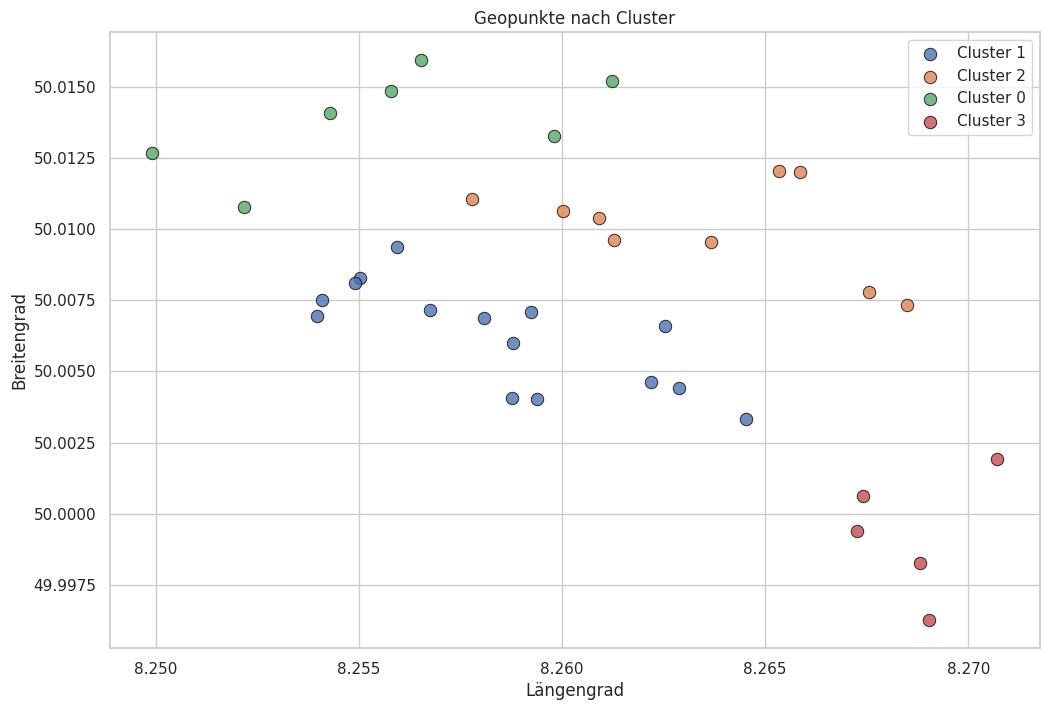

In [32]:
vis_agg = Visualizer(agg_routes, dist_matrix)
vis_agg.plot_geocodes()